## Analysis code for the simulation experiment

In [1]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()

In [2]:
def parse(path, filetype="csv"):
    data = []
    for file_name in glob.glob(f'{path}/*.{filetype}'):
        data.append(pd.read_csv(file_name, low_memory=False))
    df = pd.concat(data)
    assert len(df[df["NumActions"]>201]) == 0
    return df

env_type_conversion = {
    2: "2_36",
    3: "3_54",
    4: "4_72",
    5: "5_90"
}

In [3]:
df_pouct = parse(path="./data/simulation_results/po_uct_evaluation")
df_pouct = df_pouct.loc[df_pouct["EnvSeed"]<5000]
duplicates = df_pouct.duplicated(keep="first", subset=["EnvSeed", "EnvType", "Cost", "Steps"])
assert sum(duplicates) == 0
assert len(df_pouct) == 5000 * 4 * 2 * 4 # Seeds * Env * Cost * Steps
df_pouct["Name"] = df_pouct.apply(lambda x: f"PO-UCT {x['Steps']} steps", axis=1)
df_group = pd.DataFrame(df_pouct.groupby(["Name", "EnvType", "Cost"]).mean()[["ExpectedReward", "TrueReward", "NumActions", "NumRepeatActions", "Time"]])
df_group

ExpectedReward  TrueReward  NumActions  \
Name              EnvType Cost                                           
PO-UCT 10 steps   2_36    0.05       54.997986   55.612957    201.0000   
                          1.00     -135.947263 -134.354329    201.0000   
                  3_54    0.05       54.997142   55.583241    201.0000   
                          1.00     -135.669729 -134.244127    201.0000   
                  4_72    0.05       55.031368   55.080654    201.0000   
                          1.00     -135.889241 -135.080432    201.0000   
                  5_90    0.05       55.204484   55.204195    201.0000   
                          1.00     -135.644404 -134.566613    201.0000   
PO-UCT 100 steps  2_36    0.05      114.941935  114.811698    133.8184   
                          1.00       98.109490   98.828007     11.9016   
                  3_54    0.05      152.423241  152.488781    166.4474   
                          1.00      133.787391  133.942537     13.1182   
                  4_72    0.05      186.173106  186.341564    141.9768   
                          1.00      160.859558  162.567885     12.5492   
                  5_90    0.05      218.747339  218.666482    128.3830   
                          1.00      189.608713  189.993684     13.2152   
PO-UCT 1000 steps 2_36    0.05      115.457702  115.617499     24.0562   
                          1.00      102.227454  103.463461     10.2314   
                  3_54    0.05      155.962480  156.120783     70.3248   
                          1.00      138.329974  139.301810     10.8152   
                  4_72    0.05      188.763764  188.902296     74.6672   
                          1.00      171.638807  172.439012     12.3580   
                  5_90    0.05      220.573093  220.572069     85.9590   
                          1.00      202.692903  203.574516     13.5210   
PO-UCT 5000 steps 2_36    0.05      117.410618  117.445772     35.1700   
                          1.00      100.659663  101.379990      8.2738   
                  3_54    0.05      156.534182  156.504679     32.5720   
                          1.00      140.097656  141.495419      9.8596   
                  4_72    0.05      189.509348  189.252705     42.6964   
                          1.00      172.200803  173.331350     10.5992   
                  5_90    0.05      220.940846  221.093925     46.9508   
                          1.00      203.209859  203.983351     11.1274   

                                NumRepeatActions        Time  
Name              EnvType Cost                                
PO-UCT 10 steps   2_36    0.05          192.9856    3.241256  
                          1.00          192.9966    3.723917  
                  3_54    0.05          190.1592    3.476964  
                          1.00          190.0864    3.367210  
                  4_72    0.05          190.1558    4.116577  
                          1.00          190.1254    3.329399  
                  5_90    0.05          192.9968    3.799616  
                          1.00          193.0200    4.048894  
PO-UCT 100 steps  2_36    0.05           99.1872   25.934016  
                          1.00            2.1106    1.928477  
                  3_54    0.05          116.7820   40.302904  
                          1.00            2.1416    2.174817  
                  4_72    0.05           86.9400   37.236904  
                          1.00            1.8700    2.520834  
                  5_90    0.05           69.5704   32.318667  
                          1.00            1.9874    3.453687  
PO-UCT 1000 steps 2_36    0.05            5.9466   81.780815  
                          1.00            0.4666   28.498264  
                  3_54    0.05           34.6218  228.520148  
                          1.00            0.3662   31.861636  
                  4_72    0.05           34.6448  254.275182  
                          1.00            0.7122   41.423994  
   

In [4]:
df_myopic = parse(path="./data/simulation_results/mgpo_evaluation")
df_myopic["Name"] = "MGPO strategy"
df_myopic["EnvType"] = df_myopic["EnvType"].apply(lambda x: env_type_conversion[x])
df_group = pd.DataFrame(df_myopic.groupby(["Name", "EnvType", "Cost"]).mean()[["ExpectedReward", "TrueReward", "NumActions", "NumRepeatActions", "Time"]])
df_group

ExpectedReward  TrueReward  NumActions  \
Name          EnvType Cost                                           
MGPO strategy 2_36    0.05      118.973045  119.293507     24.6138   
                      1.00      104.749878  105.261134     10.5826   
              3_54    0.05      158.275931  158.541407     29.4882   
                      1.00      142.273838  142.867318     12.1570   
              4_72    0.05      191.138331  191.031112     24.0952   
                      1.00      173.754034  174.740198     15.4854   
              5_90    0.05      223.836244  223.681506     30.1992   
                      1.00      205.265831  206.007021     14.8934   

                            NumRepeatActions      Time  
Name          EnvType Cost                              
MGPO strategy 2_36    0.05            7.9822  0.504658  
                      1.00            0.5546  0.174669  
              3_54    0.05            9.5504  1.021853  
                      1.00            0.6504  0.445321  
              4_72    0.05            5.4400  0.996316  
                      1.00            1.3984  0.720485  
              5_90    0.05            8.1402  1.344009  
                      1.00            0.9476  0.582251

In [5]:
df_dp = parse(path="./data/simulation_results/mg_evaluation")
df_dp["Name"] = "Myopic strategy"
df_group = pd.DataFrame(df_dp.groupby(["Name", "EnvType", "Cost"]).mean()[["ExpectedReward", "TrueReward", "NumActions", "NumRepeatActions", "Time"]])
df_group

ExpectedReward  TrueReward  NumActions  \
Name            EnvType Cost                                           
Myopic strategy 2_36    0.05      115.468885  115.498002     11.5994   
                        1.00      103.689755  104.962214      9.4312   
                3_54    0.05      154.327713  153.795881     12.8258   
                        1.00      141.461366  141.936725     10.5832   
                4_72    0.05      186.905490  186.828587     13.6520   
                        1.00      173.234935  174.022681     11.3392   
                5_90    0.05      218.454709  218.002656     14.1484   
                        1.00      204.270725  204.698263     11.8244   

                              NumRepeatActions        Time  
Name            EnvType Cost                                
Myopic strategy 2_36    0.05            0.8738   15.200578  
                        1.00            0.1072   13.028898  
                3_54    0.05            0.8698   48.687234  
                        1.00            0.0996   32.034567  
                4_72    0.05            0.8578   80.244428  
                        1.00            0.1070   62.357900  
                5_90    0.05            0.8166  118.408194  
                        1.00            0.0936  117.129221

In [6]:
df = pd.concat([df_pouct, df_myopic, df_dp])

In [3]:
# Raw data 
df_pouct = parse(path="./data/simulation_results/po_uct_evaluation")
df_pouct = df_pouct.loc[df_pouct["EnvSeed"]<5000]
duplicates = df_pouct.duplicated(keep="first", subset=["EnvSeed", "EnvType", "Cost", "Steps"])
assert sum(duplicates) == 0
assert len(df_pouct) == 5000 * 4 * 2 * 4 # Seeds * Env * Cost * Steps
df_pouct["Name"] = df_pouct.apply(lambda x: f"PO-UCT {x['Steps']} steps", axis=1)
df_pouct = df_pouct[(df_pouct["EnvType"]=="5_90") & (df_pouct["Name"]=="PO-UCT 1000 steps") & (df_pouct["Cost"]==0.05)]
df_pouct["Name"] = "PO-UCT"

df_myopic = parse(path="./data/simulation_results/mgpo_evaluation")
df_myopic["Name"] = "Ours"
df_myopic["EnvType"] = df_myopic["EnvType"].apply(lambda x: env_type_conversion[x])
df_myopic = df_myopic[(df_myopic["Cost"]==0.05) & (df_myopic["EnvType"]=="5_90")]

df_dp = parse(path="./data/simulation_results/mg_evaluation")
df_dp["Name"] = "Discretized\nMeta-greedy"
df_dp = df_dp[(df_dp["Cost"]==0.05) & (df_dp["EnvType"]=="5_90")]

assert len(df_pouct) == len(df_dp) == len(df_myopic)
df_plot = pd.concat([df_myopic, df_pouct, df_dp])


Text(0, 0.5, 'Expected Score')

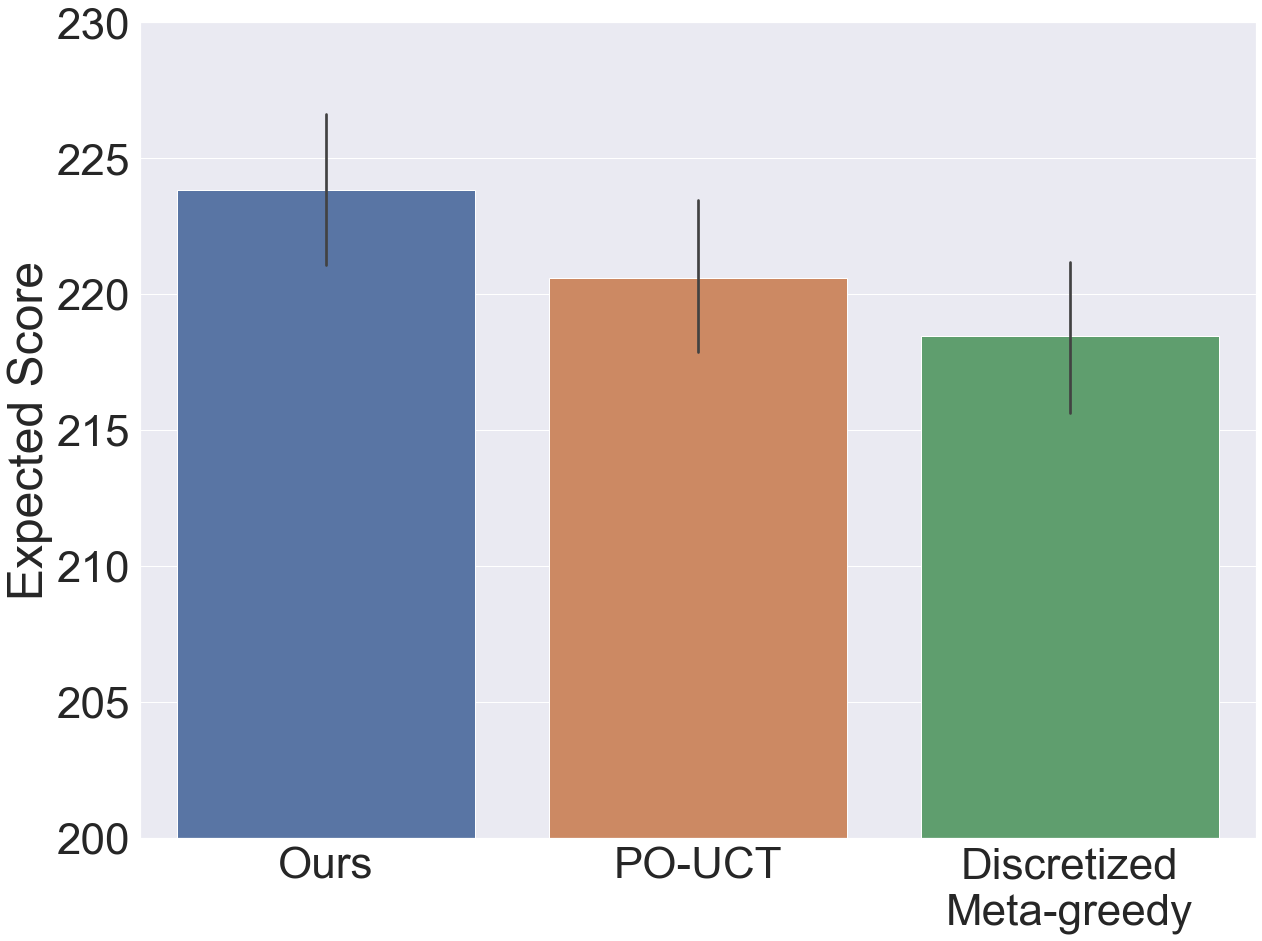

In [4]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=4)

g= sns.barplot(x = "Name", y = "ExpectedReward", data=df_plot)

g.set_title("")
g.set_xlabel("")
g.set_ylim((200, 230))
g.set_ylabel("Expected Score")

Text(0, 0.5, 'Time (s)')

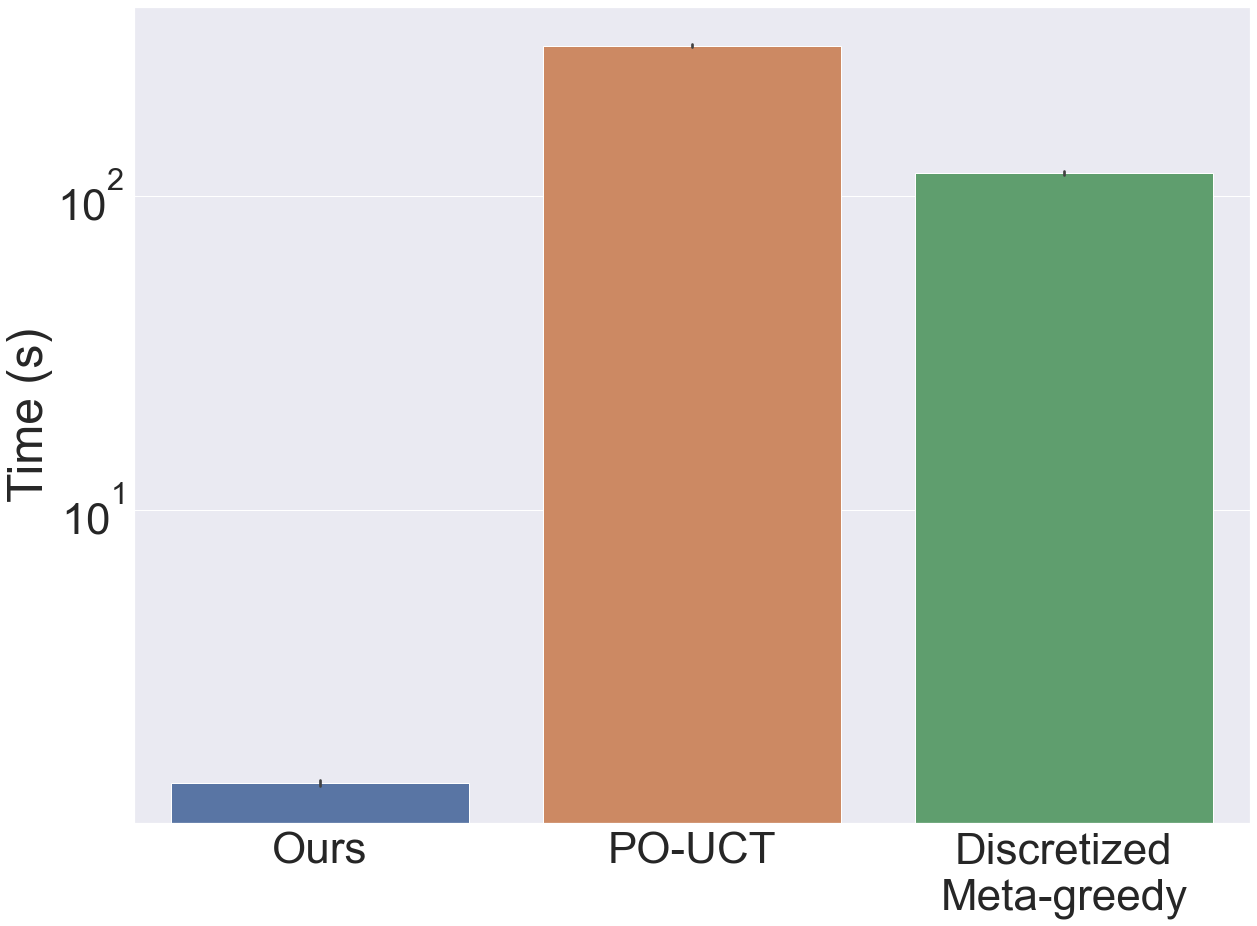

In [5]:
g= sns.barplot(x = "Name", y = "Time", data=df_plot)

g.set_title("")
g.set_xlabel("")
g.set_yscale("log")
g.set_ylabel("Time (s)")

In [7]:
df_tmp = df.copy()
df_tmp["TimePerAction"] = df_tmp["Time"] / df_tmp["NumActions"]
tmp = df_tmp.groupby(["Name"]).mean()[["ExpectedReward", "Time", "TimePerAction", "NumActions"]].round(2)
#tmp = tmp.pivot(index =  ["Cost", "Name"], columns=["EnvType"], values="TimePerAction").round(2)
tmp

,ExpectedReward,Time,TimePerAction,NumActions
Name,,,,
MGPO strategy,164.78,0.72,0.03,20.19
Myopic strategy,162.23,60.89,4.89,11.93
PO-UCT 10 steps,-40.36,3.64,0.02,201.00
PO-UCT 100 steps,156.83,18.23,0.22,77.68
PO-UCT 1000 steps,161.96,126.18,3.22,37.74
PO-UCT 5000 steps,162.57,346.65,14.19,24.66


In [8]:
df_tmp = df.copy()
tmp = df_tmp.groupby(["EnvType", "Cost", "Name"]).mean()[["ExpectedReward"]].reset_index()
tmp = tmp.pivot(index =  ["Cost", "Name"], columns=["EnvType"], values="ExpectedReward").round(2)
print(tmp.to_latex())

\begin{tabular}{llrrrr}
\toprule
     & EnvType &    2\_36 &    3\_54 &    4\_72 &    5\_90 \\
Cost & Name &         &         &         &         \\
\midrule
0.05 & MGPO strategy &  118.97 &  158.28 &  191.14 &  223.84 \\
     & Myopic strategy &  115.47 &  154.33 &  186.91 &  218.45 \\
     & PO-UCT 10 steps &   55.00 &   55.00 &   55.03 &   55.20 \\
     & PO-UCT 100 steps &  114.94 &  152.42 &  186.17 &  218.75 \\
     & PO-UCT 1000 steps &  115.46 &  155.96 &  188.76 &  220.57 \\
     & PO-UCT 5000 steps &  117.41 &  156.53 &  189.51 &  220.94 \\
1.00 & MGPO strategy &  104.75 &  142.27 &  173.75 &  205.27 \\
     & Myopic strategy &  103.69 &  141.46 &  173.23 &  204.27 \\
     & PO-UCT 10 steps & -135.95 & -135.67 & -135.89 & -135.64 \\
     & PO-UCT 100 steps &   98.11 &  133.79 &  160.86 &  189.61 \\
     & PO-UCT 1000 steps &  102.23 &  138.33 &  171.64 &  202.69 \\
     & PO-UCT 5000 steps &  100.66 &  140.10 &  172.20 &  203.21 \\
\bottomrule
\end{tabular}



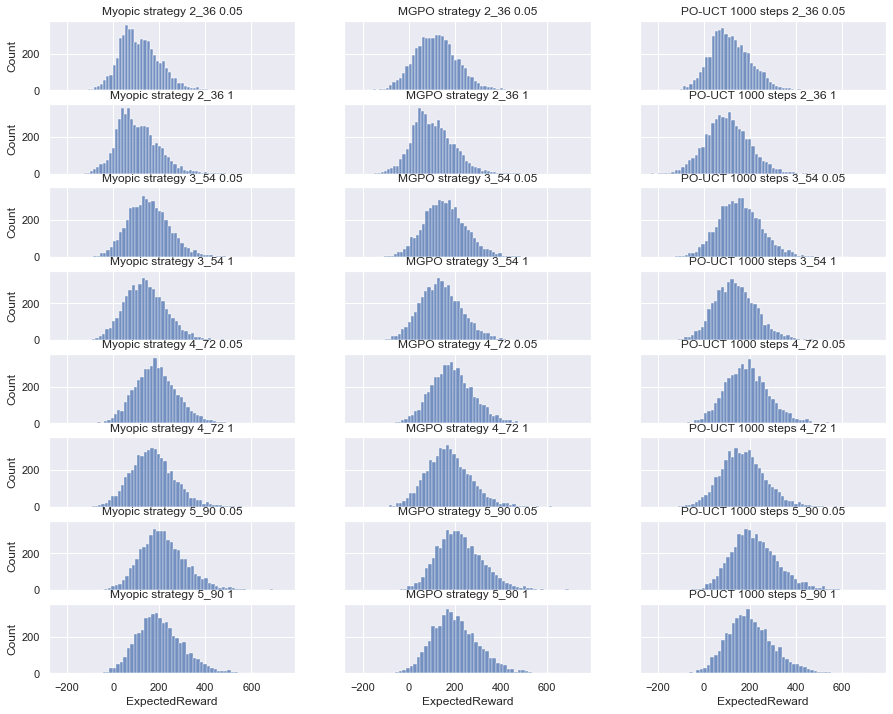

In [9]:
# Visually check normal distribution
from scipy import stats

fig, axes =plt.subplots(8,3, figsize=(15,12), sharex=True, sharey=True)
axes = axes.flatten()
i = 0
for env in ["2_36", "3_54", "4_72", "5_90"]:
    for cost in [0.05, 1]:
        filtered_df = df.loc[(df["EnvType"]==env) & (df["Cost"]==cost),]
        for name in ["Myopic strategy", "MGPO strategy", "PO-UCT 1000 steps"]:
            g = sns.histplot(filtered_df.loc[(filtered_df['Name']==name), 'ExpectedReward'], ax=axes[i])
            axes[i].title.set_text(f'{name} {env} {cost}')
            i+=1

In [10]:
df[["Name", "EnvType", "Cost", "ExpectedReward"]].to_csv("./data/simulation_results/simulation_results.csv")